In [271]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline

import json

In [6]:
movies_file = 'kaggle电影项目数据/tmdb_5000_movies.csv'
credits_file = 'kaggle电影项目数据/tmdb_5000_credits.csv'
movies = pd.read_csv(movies_file)
credits = pd.read_csv(credits_file)

In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [46]:
movies.shape

(4803, 20)

In [47]:
credits.shape

(4803, 4)

### 根据id合并两张表

In [48]:
movies_credits = pd.merge(movies, credits, left_on='id', right_on='movie_id', how='outer')
# 不用concat的原因，有可能是两张表的id并不是一一对应的

In [51]:
movies_credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [52]:
movies_credits.shape

(4803, 24)

#### 删除重复的列

In [55]:
del movies_credits['movie_id']

In [56]:
del movies_credits['title_y']

In [57]:
df = movies_credits

In [59]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [65]:
# 整体查看数据情况，数据类型和，数据缺失情况
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### 用json.loads()将str类型的dict转换为dict类型

In [71]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for columns in json_columns:
        df[columns] = df[columns].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


# 拼接genres列里面每个元素的字典里的name值
# 列入 [{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]
# 拼接后的结果为 'United States of America|United Kingdom'
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

In [76]:
credits = load_tmdb_credits(credits_file)
movies = load_tmdb_movies(movies_file)

In [77]:
del credits['title']
# 这里每行是一一对应的可以用concat
df = pd.concat([movies, credits], axis=1)

In [79]:
df['genres'] = df['genres'].apply(pipe_flatten_names)

In [80]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [81]:
liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

In [82]:
liste_genres

['Horror',
 'Thriller',
 'Action',
 'Crime',
 'Western',
 'Music',
 'Fantasy',
 'War',
 'Foreign',
 'TV Movie',
 'History',
 'Mystery',
 'Drama',
 'Documentary',
 'Comedy',
 'Family',
 'Science Fiction',
 'Romance',
 'Adventure',
 'Animation']

### 结构化电影风格genres，每个风格对应的每个风格用1，0代表包含和不包含

In [85]:
df_reduced = df[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

In [86]:
df_reduced.head()

,title,vote_average,release_date,runtime,budget,revenue
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100


In [87]:
# 针对每一条对每个风格打标签
for genre in liste_genres:
    df_reduced[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
df_reduced[:5]

,title,vote_average,release_date,runtime,budget,revenue,Horror,Thriller,Action,Crime,...,History,Mystery,Drama,Documentary,Comedy,Family,Science Fiction,Romance,Adventure,Animation
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


#### 画图

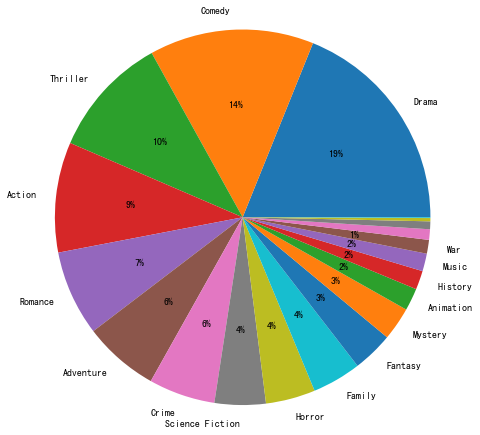

In [186]:
plt.rc('font', weight='bold')
# 统一设置各种属性
f, ax = plt.subplots(figsize=(6,6))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, df_reduced[genre].values.sum()])
# 二维列表升序排序
genre_count.sort(key = lambda x:x[1], reverse=True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
#       autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      autopct = lambda x:'%.f'%x +'%' if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal') # 轴相等
plt.tight_layout() # 紧凑显示图片,居中显示


### 计算每个风格的平均评分mean_votes_average，平均预算mean_budget，平均收入mean_revenue，平均营收profit

In [166]:
mean_per_genre = pd.DataFrame(liste_genres)

In [167]:
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['vote_average'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_votes_average']=newArray2

In [180]:
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['budget'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_budget']=newArray2

In [181]:
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['revenue'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_revenue']=newArray2

In [187]:
mean_per_genre['profit'] = mean_per_genre['mean_revenue']-mean_per_genre['mean_budget']

In [188]:
mean_per_genre

,0,mean_votes_average,mean_budget,mean_revenue,profit
0,Horror,5.626590,1.457403e+07,4.354508e+07,2.897105e+07
1,Thriller,6.010989,3.196821e+07,8.104429e+07,4.907608e+07
2,Action,5.989515,5.151075e+07,1.412131e+08,8.970235e+07
3,Crime,6.274138,2.784981e+07,6.615066e+07,3.830085e+07
4,Western,6.178049,2.707870e+07,4.624596e+07,1.916726e+07
5,Music,6.355676,1.590795e+07,4.845595e+07,3.254800e+07
6,Fantasy,6.096698,6.356061e+07,1.933542e+08,1.297936e+08
7,War,6.713889,3.528246e+07,8.415587e+07,4.887342e+07
8,Foreign,6.352941,6.580884e+05,3.646515e+05,-2.934369e+05
9,TV Movie,5.662500,1.150000e+06,0.000000e+00,-1.150000e+06


<Container object of 20 artists>

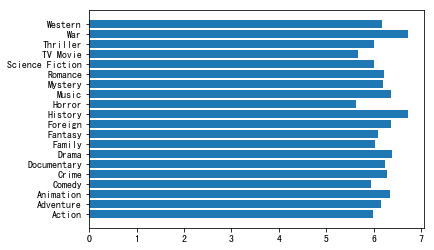

In [198]:
# mean_per_genre['mean_votes_average'].plot.barh()
plt.barh(mean_per_genre[0], mean_per_genre['mean_votes_average'])

### 每种风格的电影每年的评分、预算和收入情况

In [199]:
from datetime import datetime
t = df_reduced['release_date']
t = pd.to_datetime(t)
t = t.dt.year
df_reduced['release_year'] = t

In [201]:
df_list = []*len(liste_genres) # 这种写法莫名其妙，df_list = []就ok
for genre in liste_genres:
    df_list.append(df_reduced.groupby([genre, 'release_year']).mean().reset_index())

In [206]:
df_per_genre = []*len(liste_genres)
for i in range(len(df_list)):
    df_per_genre.append(df_list[i][df_list[i].ix[:,0] == 1])

In [240]:
columns = range(1988, 2018)
budget_genre = pd.DataFrame(columns=columns)
budget_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


In [241]:
for genre in liste_genres:
    temp = (df_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year',
                                                                values = 'budget', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    budget_genre.loc[liste_genres.index(genre)] = temp
budget_genre['genre'] = liste_genres

In [242]:
budget_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
0,4.733333e+06,6.083333e+06,2.000000e+07,2.050000e+07,2.050000e+07,1.666667e+06,2.900000e+07,1.000000e+07,2.250000e+07,3.990200e+07,...,1.178334e+07,1.639074e+07,1.572576e+07,1.151394e+07,1.675803e+07,1.102143e+07,4.919697e+06,9.720000e+06,NaN,Horror
1,1.214545e+07,2.437500e+07,3.800000e+07,2.845455e+07,1.401255e+07,2.654167e+07,3.288889e+07,2.944792e+07,3.865278e+07,5.534805e+07,...,3.357797e+07,3.280960e+07,3.089882e+07,3.168897e+07,3.583434e+07,2.289455e+07,2.580746e+07,2.504259e+07,NaN,Thriller
2,1.707143e+07,2.945455e+07,3.837500e+07,2.890909e+07,3.146889e+07,2.241765e+07,3.266667e+07,5.106000e+07,5.168182e+07,5.453289e+07,...,5.524081e+07,6.367449e+07,5.885432e+07,8.099373e+07,7.233679e+07,7.582593e+07,6.637717e+07,7.152538e+07,NaN,Action
3,1.282500e+07,2.300000e+07,4.375000e+07,1.641667e+07,1.523869e+07,2.187500e+07,2.776923e+07,2.631250e+07,2.217647e+07,3.463487e+07,...,2.304330e+07,2.426559e+07,3.657083e+07,3.061967e+07,3.291946e+07,2.157185e+07,3.630000e+07,4.017500e+07,NaN,Crime
4,1.300000e+07,NaN,1.100000e+07,NaN,1.400000e+07,2.500000e+07,6.300000e+07,3.200000e+07,NaN,NaN,...,NaN,2.740000e+07,4.500000e+07,5.000000e+07,2.550000e+08,5.666667e+06,3.571429e+07,2.500000e+07,NaN,Western
5,NaN,NaN,NaN,3.800000e+07,2.250000e+07,9.500000e+06,NaN,0.000000e+00,2.325000e+07,2.850000e+07,...,3.472727e+07,5.000000e+06,3.040000e+07,3.028571e+07,1.295835e+07,1.188890e+07,1.146530e+07,0.000000e+00,NaN,Music
6,1.100000e+07,2.100000e+07,3.066667e+07,2.650000e+07,3.566667e+07,2.466000e+07,1.955556e+07,3.600000e+07,4.250000e+07,4.195000e+07,...,6.671591e+07,8.652857e+07,8.766667e+07,8.830526e+07,1.055953e+08,1.117500e+08,7.800000e+07,1.266531e+08,NaN,Fantasy
7,6.300000e+07,1.366667e+07,NaN,NaN,4.000000e+07,1.100000e+07,3.500000e+07,3.566667e+07,3.650000e+07,NaN,...,3.300000e+07,2.505785e+07,3.985000e+07,3.500000e+07,1.666667e+07,4.860000e+07,3.000000e+07,3.333333e+07,NaN,War
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250000e+06,...,8.125018e+05,0.000000e+00,0.000000e+00,2.250000e+05,NaN,NaN,NaN,NaN,NaN,Foreign
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000e+00,2.000000e+06,5.000000e+05,NaN,NaN,NaN,NaN,TV Movie


In [243]:
budget_genre.index = budget_genre['genre']
budget_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Horror,4.733333e+06,6.083333e+06,2.000000e+07,2.050000e+07,2.050000e+07,1.666667e+06,2.900000e+07,1.000000e+07,2.250000e+07,3.990200e+07,...,1.178334e+07,1.639074e+07,1.572576e+07,1.151394e+07,1.675803e+07,1.102143e+07,4.919697e+06,9.720000e+06,NaN,Horror
Thriller,1.214545e+07,2.437500e+07,3.800000e+07,2.845455e+07,1.401255e+07,2.654167e+07,3.288889e+07,2.944792e+07,3.865278e+07,5.534805e+07,...,3.357797e+07,3.280960e+07,3.089882e+07,3.168897e+07,3.583434e+07,2.289455e+07,2.580746e+07,2.504259e+07,NaN,Thriller
Action,1.707143e+07,2.945455e+07,3.837500e+07,2.890909e+07,3.146889e+07,2.241765e+07,3.266667e+07,5.106000e+07,5.168182e+07,5.453289e+07,...,5.524081e+07,6.367449e+07,5.885432e+07,8.099373e+07,7.233679e+07,7.582593e+07,6.637717e+07,7.152538e+07,NaN,Action
Crime,1.282500e+07,2.300000e+07,4.375000e+07,1.641667e+07,1.523869e+07,2.187500e+07,2.776923e+07,2.631250e+07,2.217647e+07,3.463487e+07,...,2.304330e+07,2.426559e+07,3.657083e+07,3.061967e+07,3.291946e+07,2.157185e+07,3.630000e+07,4.017500e+07,NaN,Crime
Western,1.300000e+07,NaN,1.100000e+07,NaN,1.400000e+07,2.500000e+07,6.300000e+07,3.200000e+07,NaN,NaN,...,NaN,2.740000e+07,4.500000e+07,5.000000e+07,2.550000e+08,5.666667e+06,3.571429e+07,2.500000e+07,NaN,Western
Music,NaN,NaN,NaN,3.800000e+07,2.250000e+07,9.500000e+06,NaN,0.000000e+00,2.325000e+07,2.850000e+07,...,3.472727e+07,5.000000e+06,3.040000e+07,3.028571e+07,1.295835e+07,1.188890e+07,1.146530e+07,0.000000e+00,NaN,Music
Fantasy,1.100000e+07,2.100000e+07,3.066667e+07,2.650000e+07,3.566667e+07,2.466000e+07,1.955556e+07,3.600000e+07,4.250000e+07,4.195000e+07,...,6.671591e+07,8.652857e+07,8.766667e+07,8.830526e+07,1.055953e+08,1.117500e+08,7.800000e+07,1.266531e+08,NaN,Fantasy
War,6.300000e+07,1.366667e+07,NaN,NaN,4.000000e+07,1.100000e+07,3.500000e+07,3.566667e+07,3.650000e+07,NaN,...,3.300000e+07,2.505785e+07,3.985000e+07,3.500000e+07,1.666667e+07,4.860000e+07,3.000000e+07,3.333333e+07,NaN,War
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250000e+06,...,8.125018e+05,0.000000e+00,0.000000e+00,2.250000e+05,NaN,NaN,NaN,NaN,NaN,Foreign


In [230]:
columns = range(1988,2018)
revenue_genre = pd.DataFrame( columns = columns)
revenue_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


In [231]:
for genre in liste_genres:
    temp=(df_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'revenue', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    revenue_genre.loc[liste_genres.index(genre)]=temp
revenue_genre['genre']=liste_genres

In [232]:
revenue_genre.index = revenue_genre['genre']
revenue_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Horror,2.093621e+07,1.754668e+07,3.435932e+07,1.131872e+08,7.415122e+07,5.330757e+06,8.319183e+07,2.671513e+07,4.760999e+07,8.983488e+07,...,3.082346e+07,4.421287e+07,3.788669e+07,3.778651e+07,7.184334e+07,4.408987e+07,2.068814e+07,4.222806e+07,NaN,Horror
Thriller,4.710995e+07,5.501500e+07,1.470854e+08,1.229121e+08,1.066051e+08,9.739472e+07,1.027076e+08,9.240182e+07,8.179710e+07,1.315105e+08,...,5.795111e+07,7.575624e+07,7.497611e+07,1.017465e+08,8.513178e+07,7.388507e+07,9.578632e+07,6.597147e+07,NaN,Thriller
Action,6.098073e+07,1.220110e+08,1.163004e+08,7.159942e+07,1.594277e+08,5.637173e+07,8.832568e+07,1.178188e+08,1.633356e+08,1.053358e+08,...,1.717490e+08,1.371655e+08,1.621480e+08,2.529830e+08,1.718815e+08,2.575422e+08,2.364232e+08,2.108906e+08,NaN,Action
Crime,2.593798e+07,5.225724e+07,7.694114e+07,1.049300e+08,8.962918e+07,7.733952e+07,1.219430e+08,7.811012e+07,4.683539e+07,6.534840e+07,...,4.865874e+07,4.074380e+07,9.365526e+07,9.149609e+07,6.650704e+07,4.022622e+07,7.479586e+07,1.388020e+08,NaN,Crime
Western,4.472664e+07,NaN,2.121044e+08,NaN,1.591574e+08,5.650506e+07,2.505200e+07,1.855246e+07,NaN,NaN,...,NaN,5.495596e+07,8.211604e+07,2.126841e+08,8.928991e+07,1.147618e+06,9.841996e+07,1.397284e+06,NaN,Western
Music,NaN,NaN,NaN,3.441689e+07,2.663520e+08,1.059997e+06,NaN,1.062700e+08,3.526179e+07,5.178332e+07,...,8.765727e+07,1.763818e+06,1.249970e+08,1.163449e+08,1.223540e+07,3.468455e+07,7.920151e+07,0.000000e+00,NaN,Music
Fantasy,9.510781e+07,2.056745e+08,1.998274e+08,1.233066e+08,1.624521e+08,3.293630e+07,1.203390e+08,1.282671e+08,8.220414e+07,9.090646e+07,...,2.867183e+08,2.444391e+08,2.578499e+08,3.297305e+08,2.629811e+08,3.657594e+08,1.596482e+08,3.542139e+08,NaN,Fantasy
War,1.890156e+08,6.261002e+07,NaN,NaN,7.550586e+07,1.731828e+08,9.248560e+07,7.500000e+07,1.664186e+08,NaN,...,1.104578e+08,3.907929e+07,4.650904e+07,6.581907e+07,4.976520e+07,1.874737e+08,5.321016e+07,3.148244e+07,NaN,War
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,1.750000e+00,0.000000e+00,0.000000e+00,1.113000e+05,NaN,NaN,NaN,NaN,NaN,Foreign


In [233]:
columns = range(1988,2018)
vote_avg_genre = pd.DataFrame( columns = columns)
vote_avg_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


In [234]:
for genre in liste_genres:
    temp=(df_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'vote_average', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    vote_avg_genre.loc[liste_genres.index(genre)]=temp
vote_avg_genre['genre']=liste_genres

In [235]:
vote_avg_genre.index = vote_avg_genre['genre']
vote_avg_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Horror,6.022222,5.500000,5.300000,5.900000,6.266667,5.100000,6.666667,5.583333,6.000000,6.020000,...,5.706667,5.529630,5.412500,5.181818,5.208000,4.914286,4.984848,5.600000,NaN,Horror
Thriller,6.127273,5.825000,6.455556,6.418182,6.300000,6.150000,6.055556,6.270833,5.947222,6.134146,...,5.850847,6.066071,6.017391,5.746552,5.926415,5.509091,5.444776,5.785185,NaN,Thriller
Action,6.385714,6.400000,6.500000,5.927273,6.300000,6.247059,5.828571,5.992000,5.904545,5.700000,...,5.894118,6.038776,5.968966,5.879070,6.044643,5.857407,5.684783,5.866667,NaN,Action
Crime,6.350000,6.166667,6.850000,6.683333,6.490909,6.487500,6.338462,6.300000,6.305882,6.387500,...,6.021875,6.123333,6.295833,5.955556,6.183784,5.762963,5.419231,5.550000,NaN,Crime
Western,6.600000,NaN,7.050000,NaN,7.700000,7.400000,6.500000,6.300000,NaN,NaN,...,NaN,6.220000,5.700000,6.650000,5.900000,5.133333,5.185714,5.400000,NaN,Western
Music,NaN,NaN,NaN,6.700000,6.300000,6.250000,NaN,6.900000,6.450000,5.900000,...,5.818182,5.100000,5.560000,6.585714,6.675000,6.244444,5.687500,6.000000,NaN,Music
Fantasy,6.900000,6.400000,6.866667,5.950000,6.750000,5.790000,6.055556,5.887500,5.740000,5.520000,...,6.013636,5.909524,5.953333,6.273684,5.947619,6.481250,6.420000,5.846154,NaN,Fantasy
War,5.700000,7.166667,NaN,NaN,7.100000,7.450000,6.550000,7.100000,6.600000,NaN,...,7.050000,6.900000,6.200000,6.100000,5.766667,6.790000,7.250000,6.466667,NaN,War
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.300000,...,6.350000,5.200000,5.750000,6.900000,NaN,NaN,NaN,NaN,NaN,Foreign


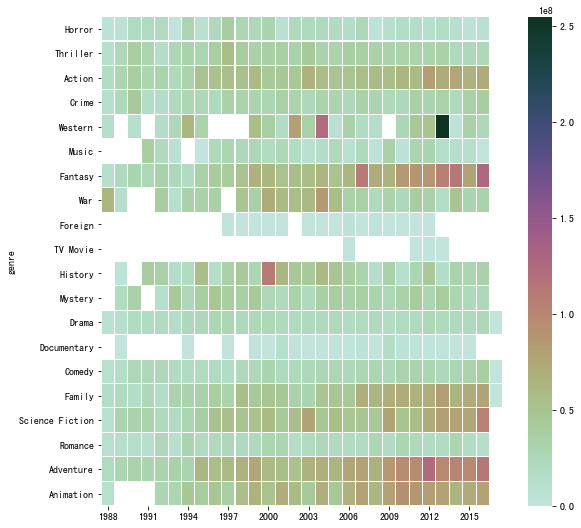

In [284]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(budget_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

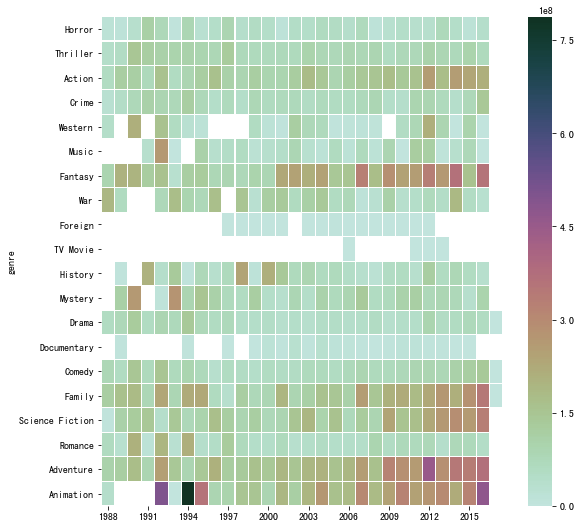

In [285]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(revenue_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

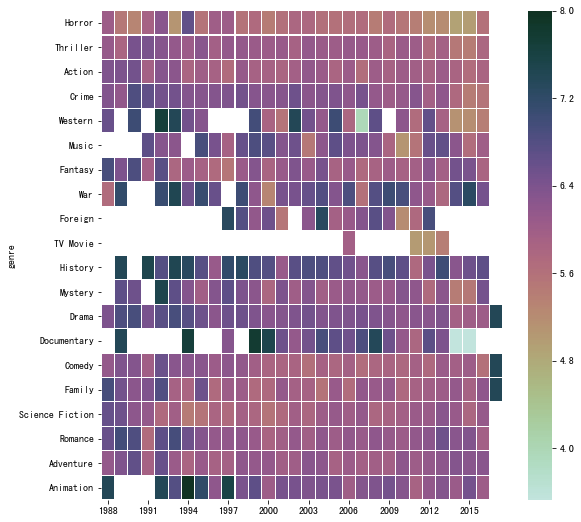

In [296]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(vote_avg_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)